In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("./traininingdata.txt",sep=';')
test_df = pd.read_csv("./testdata.txt",sep=';')

In [3]:
train_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,divorced,secondary,no,-78,yes,yes,cellular,29,jul,10,23,-1,0,unknown,no
1,50,management,married,tertiary,no,106,yes,no,unknown,15,may,388,2,-1,0,unknown,no
2,47,admin.,married,secondary,no,407,yes,no,unknown,5,jun,67,12,-1,0,unknown,no
3,39,admin.,divorced,secondary,no,952,yes,no,unknown,16,jun,62,1,-1,0,unknown,no
4,30,management,single,tertiary,no,364,no,no,cellular,30,apr,306,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,30,management,single,tertiary,no,1243,yes,no,telephone,13,nov,86,1,174,1,failure,no
36164,60,blue-collar,married,secondary,no,171,yes,no,unknown,19,may,219,2,-1,0,unknown,no
36165,41,technician,married,secondary,no,-274,yes,no,unknown,27,may,182,3,-1,0,unknown,no
36166,45,blue-collar,married,primary,no,103,no,no,cellular,28,jan,64,3,-1,0,unknown,no


In [4]:
test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,48,housemaid,married,tertiary,no,468,yes,no,unknown,14,may,220,1,-1,0,unknown,no
1,31,management,single,tertiary,no,10215,no,no,cellular,22,aug,139,2,-1,0,unknown,no
2,45,blue-collar,married,primary,no,900,yes,no,unknown,9,jun,213,1,-1,0,unknown,no
3,58,blue-collar,married,primary,no,1231,no,no,unknown,20,jun,21,3,-1,0,unknown,no
4,35,technician,single,tertiary,no,5301,no,no,cellular,21,nov,937,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9038,27,services,single,secondary,no,1,yes,yes,unknown,2,jun,162,3,-1,0,unknown,no
9039,34,blue-collar,married,secondary,no,175,yes,no,cellular,14,may,50,2,364,2,failure,no
9040,34,blue-collar,married,primary,no,1873,yes,no,cellular,2,feb,192,1,-1,0,unknown,no
9041,37,technician,single,secondary,no,61,yes,no,unknown,19,may,182,8,-1,0,unknown,no


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36168 entries, 0 to 36167
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36168 non-null  int64 
 1   job        36168 non-null  object
 2   marital    36168 non-null  object
 3   education  36168 non-null  object
 4   default    36168 non-null  object
 5   balance    36168 non-null  int64 
 6   housing    36168 non-null  object
 7   loan       36168 non-null  object
 8   contact    36168 non-null  object
 9   day        36168 non-null  int64 
 10  month      36168 non-null  object
 11  duration   36168 non-null  int64 
 12  campaign   36168 non-null  int64 
 13  pdays      36168 non-null  int64 
 14  previous   36168 non-null  int64 
 15  poutcome   36168 non-null  object
 16  y          36168 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.7+ MB


In [6]:
#from pandas import DataFrame
#df=DataFrame(train_df)
#de=df.loc[:,['balance', 'loan']]
#de
#de=df.iloc[1:4, [0,1,2 ]]
#de

In [7]:
features = train_df.columns
features

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
f'{len(features)} features in total', train_df.dtypes

('17 features in total',
 age           int64
 job          object
 marital      object
 education    object
 default      object
 balance       int64
 housing      object
 loan         object
 contact      object
 day           int64
 month        object
 duration      int64
 campaign      int64
 pdays         int64
 previous      int64
 poutcome     object
 y            object
 dtype: object)

In [9]:
# Data categories
numeric_var = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
binary_var = ['default', 'housing', 'loan', 'y']
categorical_var = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

In [10]:
# data replacement for '-1' in feature of pdays
max_pdays_train = max(train_df['pdays'])
max_pdays_test = max(test_df['pdays'])
max_pdays = max(max_pdays_train, max_pdays_test)
# max_pdays
train_df['pdays'] = train_df['pdays'].replace({-1: max_pdays})
test_df['pdays'] = test_df['pdays'].replace({-1: max_pdays})
# train_df['pdays']

In [11]:
#data replacement for the feature of 'y'
train_df = train_df.replace({'yes': 1, 'no': 0})
test_df = test_df.replace({'yes': 1, 'no': 0})
train_df
x_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]
x_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]
y_test

0       0
1       0
2       0
3       0
4       1
       ..
9038    0
9039    0
9040    0
9041    0
9042    0
Name: y, Length: 9043, dtype: int64

In [12]:
#One-hot-encoding and check the missing columns on test data set
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)
missing_cols = set(x_train.columns) - set(x_test.columns)
# len(set(x_train.columns))
len(set(x_test.columns))
for c in missing_cols:
    x_test[c] = 0
x_test = x_test[x_train.columns]
x_test

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,48,0,468,1,0,14,220,1,871,0,...,0,0,1,0,0,0,0,0,0,1
1,31,0,10215,0,0,22,139,2,871,0,...,0,0,0,0,0,0,0,0,0,1
2,45,0,900,1,0,9,213,1,871,0,...,1,0,0,0,0,0,0,0,0,1
3,58,0,1231,0,0,20,21,3,871,0,...,1,0,0,0,0,0,0,0,0,1
4,35,0,5301,0,0,21,937,2,871,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9038,27,0,1,1,1,2,162,3,871,0,...,1,0,0,0,0,0,0,0,0,1
9039,34,0,175,1,0,14,50,2,364,2,...,0,0,1,0,0,0,1,0,0,0
9040,34,0,1873,1,0,2,192,1,871,0,...,0,0,0,0,0,0,0,0,0,1
9041,37,0,61,1,0,19,182,8,871,0,...,0,0,1,0,0,0,0,0,0,1


In [17]:
#data standardization
from sklearn.preprocessing import StandardScaler

def standardization(df, cols):
    scaler = StandardScaler()
    df[cols] = scaler.fit_transform(df[cols])

standardization(x_train, numeric_var)
standardization(x_test, numeric_var)
   




In [18]:
x_train

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.099649,0,-0.465780,1,1,1.590410,-0.965700,6.485410,0.461388,-0.243040,...,0,0,0,0,0,0,0,0,0,1
1,0.853196,0,-0.406390,1,0,-0.093650,0.504062,-0.246819,0.461388,-0.243040,...,0,0,1,0,0,0,0,0,0,1
2,0.570616,0,-0.309235,1,0,-1.296549,-0.744070,2.959004,0.461388,-0.243040,...,1,0,0,0,0,0,0,0,0,1
3,-0.182931,0,-0.133323,1,0,0.026640,-0.763511,-0.567401,0.461388,-0.243040,...,1,0,0,0,0,0,0,0,0,1
4,-1.030671,0,-0.323114,0,0,1.710700,0.185224,-0.246819,0.461388,-0.243040,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,-1.030671,0,-0.039396,1,0,-0.334230,-0.670193,-0.567401,-2.283829,0.176283,...,0,0,0,1,0,0,1,0,0,0
36164,1.795129,0,-0.385410,1,0,0.387510,-0.153054,-0.246819,0.461388,-0.243040,...,0,0,1,0,0,0,0,0,0,1
36165,0.005456,0,-0.529044,1,0,1.349830,-0.296920,0.073764,0.461388,-0.243040,...,0,0,1,0,0,0,0,0,0,1
36166,0.382229,0,-0.407358,0,0,1.470120,-0.755734,0.073764,0.461388,-0.243040,...,0,0,0,0,0,0,0,0,0,1


In [19]:
x_test

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.666889,0,-0.313062,1,0,-0.229477,-0.144325,-0.577738,0.473163,-0.299983,...,0,0,1,0,0,0,0,0,0,1
1,-0.932760,0,3.142136,0,0,0.727700,-0.457210,-0.245624,0.473163,-0.299983,...,0,0,0,0,0,0,0,0,0,1
2,0.384598,0,-0.159923,1,0,-0.827713,-0.171364,-0.577738,0.473163,-0.299983,...,1,0,0,0,0,0,0,0,0,1
3,1.607859,0,-0.042587,0,0,0.488406,-0.913018,0.086490,0.473163,-0.299983,...,1,0,0,0,0,0,0,0,0,1
4,-0.556372,0,1.400180,0,0,0.608053,2.625291,-0.245624,0.473163,-0.299983,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9038,-1.309148,0,-0.478608,1,1,-1.665243,-0.368366,0.086490,0.473163,-0.299983,...,1,0,0,0,0,0,0,0,0,1
9039,-0.650469,0,-0.416927,1,0,-0.229477,-0.800998,-0.245624,-1.497864,0.728742,...,0,0,1,0,0,0,1,0,0,0
9040,-0.650469,0,0.184994,1,0,-1.665243,-0.252482,-0.577738,0.473163,-0.299983,...,0,0,0,0,0,0,0,0,0,1
9041,-0.368178,0,-0.457339,1,0,0.368759,-0.291110,1.747060,0.473163,-0.299983,...,0,0,1,0,0,0,0,0,0,1


In [20]:
# RandomForest algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
rf = RandomForestClassifier (n_estimators=100, random_state=1, oob_score=True,class_weight='balanced')

In [21]:
#out-of-bag score
rf.fit(x_train, y_train)
rf.oob_score_

0.9025381552753815

In [22]:
#to get the prediction
y_hat_train = rf.predict(x_train)
y_hat_test = rf.predict(x_test)
metrics.roc_auc_score(y_test,y_hat_test)

0.6441081043970678

In [23]:
rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', oob_score=True, random_state=1)

In [24]:
#10- fold cross validation on training data
from sklearn.model_selection import cross_val_score
 
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
 
print ("OOB_SCORE=", "%.4f" % rf.oob_score_) 

cv_score = cross_val_score(rf, x_train, y_train, cv=10)
print(cv_score)
print ("10-fold Cross Validation Score=", "%.4f" % np.mean(cv_score)) 

OOB_SCORE= 0.9025
[0.899 0.903 0.904 0.904 0.900 0.906 0.909 0.900 0.902 0.900]
10-fold Cross Validation Score= 0.9026


In [25]:
print("train accuracy score : ", metrics.accuracy_score(y_train, y_hat_train))
print("test accuracy score : ", metrics.accuracy_score(y_test, y_hat_test))

train accuracy score :  0.9999723512497235
test accuracy score :  0.9014707508570164


In [26]:
importances = rf.feature_importances_

In [27]:
importances

array([0.072, 0.002, 0.076, 0.025, 0.010, 0.067, 0.342, 0.034, 0.036,
       0.020, 0.007, 0.008, 0.003, 0.002, 0.008, 0.005, 0.003, 0.005,
       0.004, 0.008, 0.003, 0.001, 0.005, 0.009, 0.008, 0.006, 0.009,
       0.009, 0.004, 0.015, 0.004, 0.025, 0.011, 0.010, 0.002, 0.008,
       0.005, 0.010, 0.011, 0.012, 0.013, 0.009, 0.011, 0.006, 0.006,
       0.003, 0.034, 0.010])

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat_test, target_names=['no','yes']))

              precision    recall  f1-score   support

          no       0.91      0.98      0.95      7985
         yes       0.67      0.31      0.42      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.64      0.68      9043
weighted avg       0.89      0.90      0.88      9043



In [29]:
features_list = x_train.columns
features_list

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

To list out the Impotrance for each feature

In [30]:
feature_importances = [(feature, round(importances,3) )for feature, importances in zip(features_list, importances)]
feature_importances
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable RF: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable RF: duration             Importance: 0.342
Variable RF: balance              Importance: 0.076
Variable RF: age                  Importance: 0.072
Variable RF: day                  Importance: 0.067
Variable RF: pdays                Importance: 0.036
Variable RF: campaign             Importance: 0.034
Variable RF: poutcome_success     Importance: 0.034
Variable RF: housing              Importance: 0.025
Variable RF: contact_unknown      Importance: 0.025
Variable RF: previous             Importance: 0.02
Variable RF: contact_cellular     Importance: 0.015
Variable RF: month_may            Importance: 0.013
Variable RF: month_mar            Importance: 0.012
Variable RF: month_apr            Importance: 0.011
Variable RF: month_jun            Importance: 0.011
Variable RF: month_oct            Importance: 0.011
Variable RF: loan                 Importance: 0.01
Variable RF: month_aug            Importance: 0.01
Variable RF: month_jul            Importance: 0.01
Variable RF: pou

In [31]:
import matplotlib.pyplot as plt
x_values = list(range(len(importances)))
# x_values

To plot the Barchart and show the feature importances

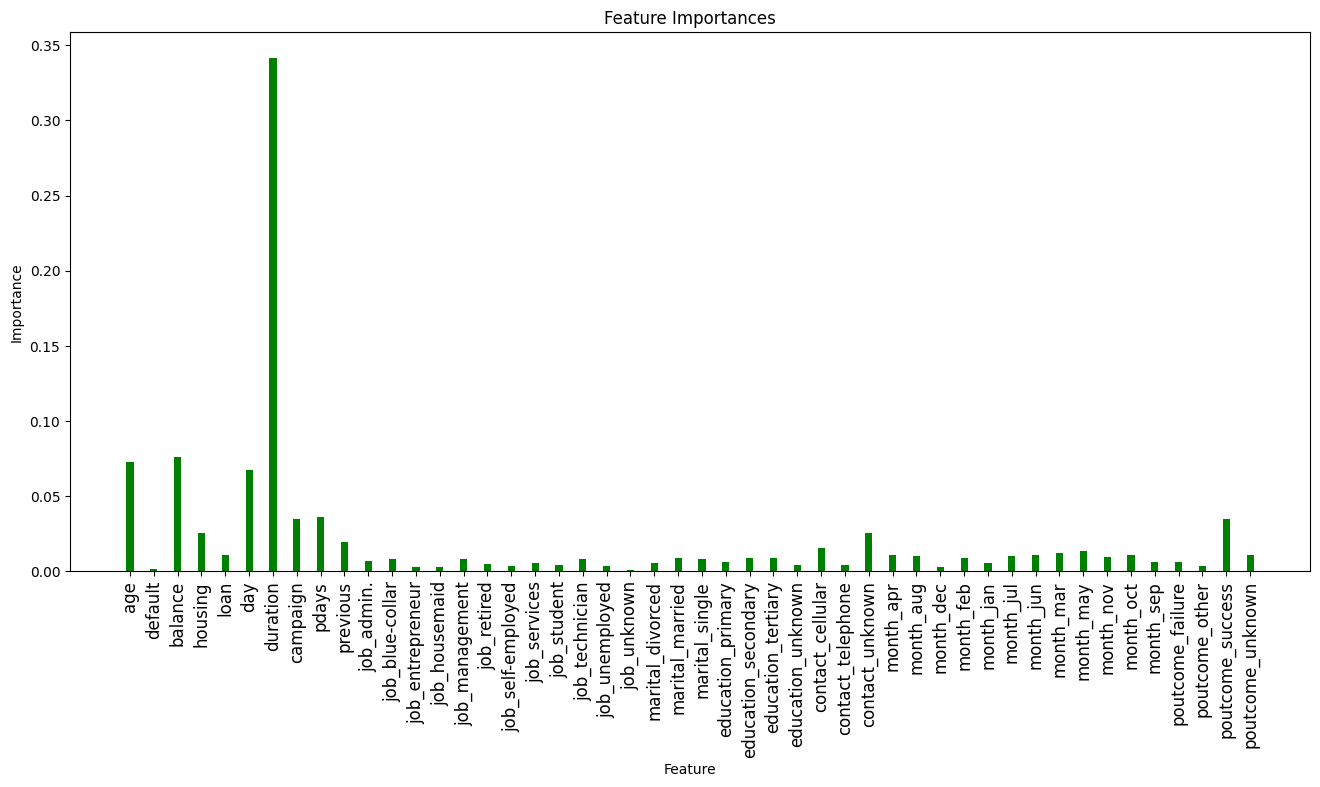

In [32]:
plt.figure(figsize=(16,7))
plt.bar(x_values, importances,0.3,orientation = 'vertical',color='green')
plt.xticks(x_values, features_list,rotation=90,fontsize=12)
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Feature Importances');

To evaluate the number of estimators and maximun of depth

In [33]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier()
param = {'n_estimators':[10,50,100,150,300,500,800,1200],'max_depth':[3,5,8,15,25,30]}
gc=GridSearchCV(rf,param_grid=param,cv=10)
gc.fit(x_train,y_train)
print(gc.score(x_test,y_test))
print(gc.best_params_)

0.9031294924250802
{'max_depth': 30, 'n_estimators': 300}


In [35]:
gc.cv_results_

{'mean_fit_time': array([0.085, 0.356, 0.705, 1.079, 2.254, 6.102, 5.488, 8.159, 0.108,
        0.506, 0.992, 2.194, 3.356, 4.934, 8.336, 39.421, 0.155, 0.710,
        1.416, 2.118, 4.198, 7.010, 11.406, 39.212, 0.600, 2.847, 4.882,
        8.262, 15.887, 26.775, 26.776, 54.379, 0.361, 1.565, 2.990, 4.516,
        8.973, 15.534, 25.747, 52.718, 0.326, 1.543, 3.144, 4.654, 17.800,
        16.561, 51.591, 45.358]),
 'std_fit_time': array([0.008, 0.008, 0.021, 0.117, 0.065, 2.039, 0.080, 0.085, 0.005,
        0.018, 0.016, 0.876, 1.128, 0.128, 0.202, 81.702, 0.009, 0.012,
        0.025, 0.022, 0.045, 0.064, 0.501, 0.086, 0.015, 0.024, 1.216,
        0.044, 1.696, 0.988, 8.564, 10.847, 0.039, 0.086, 0.029, 0.047,
        0.075, 0.466, 1.796, 41.808, 0.018, 0.034, 0.072, 0.068, 25.122,
        0.363, 82.083, 14.262]),
 'mean_score_time': array([0.005, 0.013, 0.022, 0.030, 0.067, 0.199, 0.150, 0.221, 0.006,
        0.014, 0.025, 0.063, 0.083, 0.117, 0.193, 0.300, 0.004, 0.018,
        0.032,

In [36]:
pd.DataFrame(gc.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.085364,0.008142,0.004554,0.003787,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.883329,0.886923,0.883882,0.884435,0.882776,0.883605,0.883329,0.892452,0.895465,0.883296,0.885949,0.004203,41
1,0.356384,0.008006,0.012695,0.004674,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.883329,0.883052,0.883052,0.884158,0.883052,0.883052,0.883882,0.882776,0.883020,0.883573,0.883295,0.000418,44
2,0.705092,0.020716,0.022470,0.003473,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.883052,0.883605,0.883052,0.883605,0.883052,0.885264,0.883052,0.882776,0.882743,0.883020,0.883322,0.000703,42
3,1.078736,0.117009,0.030246,0.004783,3,150,"{'max_depth': 3, 'n_estimators': 150}",0.883052,0.883052,0.883052,0.884158,0.883605,0.883052,0.883052,0.882776,0.883296,0.883850,0.883295,0.000414,43
4,2.254271,0.065314,0.067052,0.010643,3,300,"{'max_depth': 3, 'n_estimators': 300}",0.883052,0.883052,0.883052,0.883605,0.883052,0.883605,0.883052,0.882776,0.883020,0.883020,0.883129,0.000251,47
5,6.102124,2.039064,0.199108,0.086781,3,500,"{'max_depth': 3, 'n_estimators': 500}",0.883052,0.883329,0.883052,0.883329,0.883052,0.883605,0.883329,0.882776,0.883020,0.883296,0.883184,0.000223,45
6,5.487693,0.079712,0.149970,0.006388,3,800,"{'max_depth': 3, 'n_estimators': 800}",0.883052,0.883052,0.883329,0.883605,0.883052,0.883052,0.883605,0.882776,0.882743,0.883296,0.883156,0.000285,46
7,8.158991,0.084789,0.220563,0.005654,3,1200,"{'max_depth': 3, 'n_estimators': 1200}",0.883052,0.883052,0.883052,0.883605,0.883052,0.883052,0.883605,0.882776,0.883020,0.883020,0.883129,0.000251,47
8,0.107687,0.005184,0.006345,0.003330,5,10,"{'max_depth': 5, 'n_estimators': 10}",0.894388,0.891346,0.889135,0.895494,0.895217,0.884435,0.897705,0.886923,0.894358,0.892699,0.892170,0.003978,40
9,0.506413,0.017964,0.013668,0.003780,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.893835,0.886923,0.891899,0.892176,0.895494,0.890517,0.893282,0.892176,0.894358,0.893529,0.892419,0.002267,39


In [37]:
#from sklearn.model_selection import GridSearchCV
#rf=RandomForestClassifier()
#param = {'max_depth':[25,30,35,40,45]}
#gc=GridSearchCV(rf,param_grid=param,cv=10)
#gc.fit(x_train,y_train)
#print(gc.score(x_test,y_test))
#print(gc.best_params_)

In [38]:
#pd.DataFrame(gc.cv_results_)

In [39]:
print("f1: ",f1_score(y_hat_test, y_test))

f1:  0.4225534672715489


Text(0, 0.5, 'f1_score')

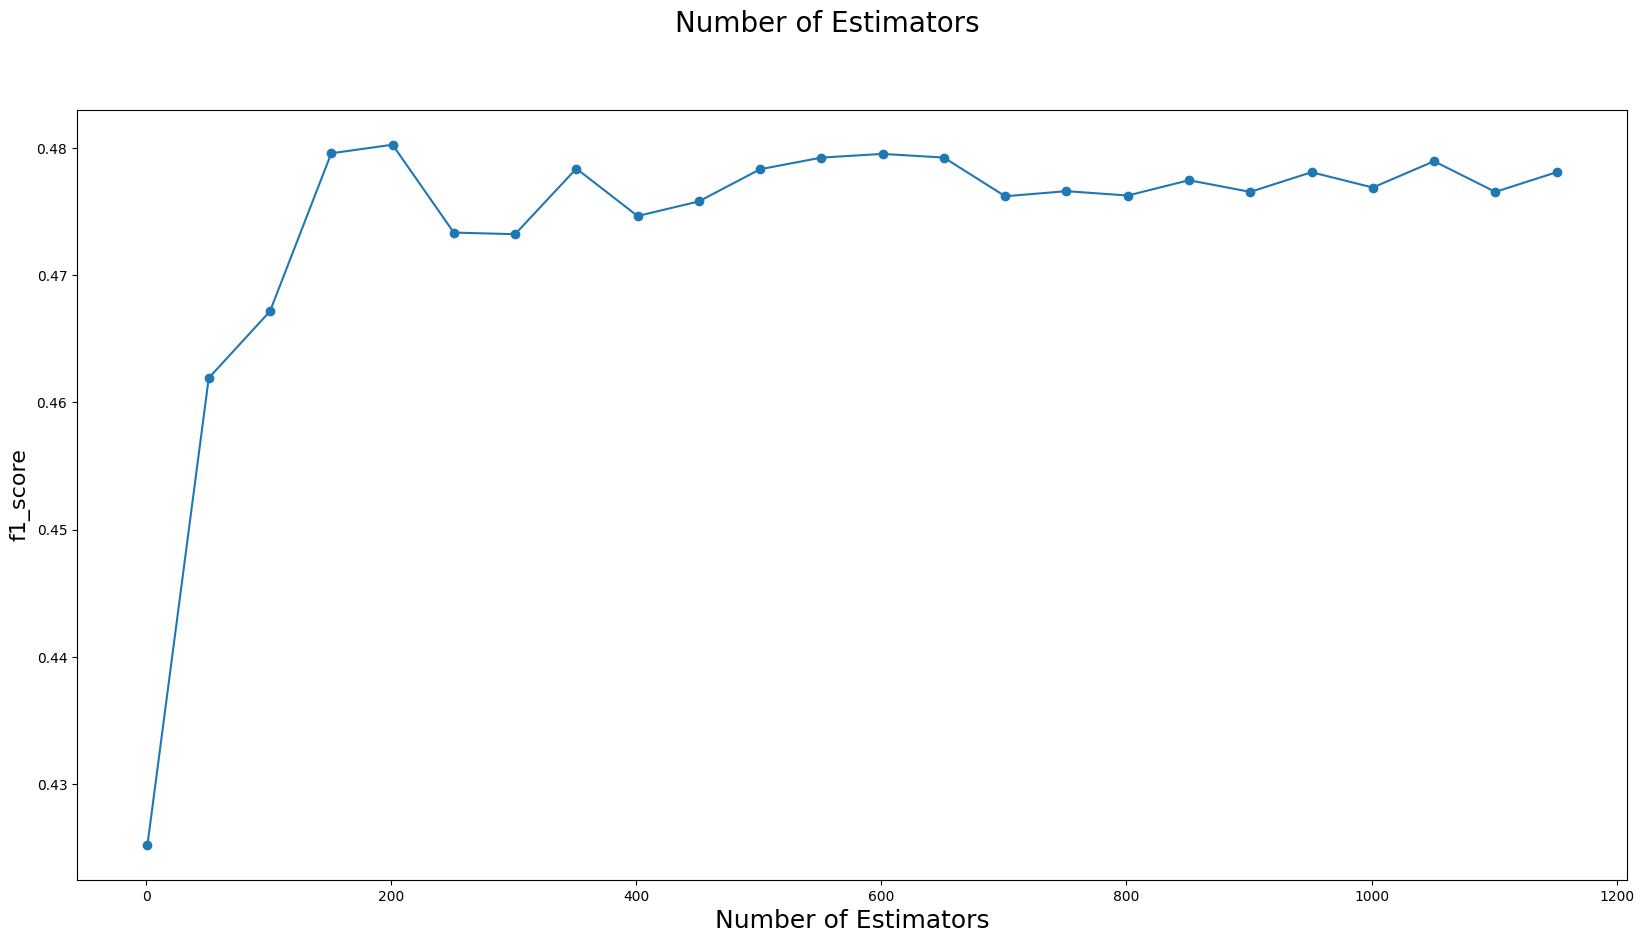

In [40]:
# data visualisation on f1_score and find the best num_estimators
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

score_array =[]
num_estimators = []
for k in range(1,1201,50):
    clf = RandomForestClassifier(n_estimators=k, random_state=1, max_depth=25) 
    clf = clf.fit(x_train, y_train)

    score_array.append(f1_score(y_test,clf.predict(x_test)))
    num_estimators.append(k)
    
fig = plt.figure(figsize=(20, 10))
plt.plot(num_estimators, score_array, marker='o')
fig.suptitle('Number of Estimators', fontsize=20)
plt.xlabel('Number of Estimators', fontsize=18)
plt.ylabel('f1_score', fontsize=16)

Text(0, 0.5, 'f1_score')

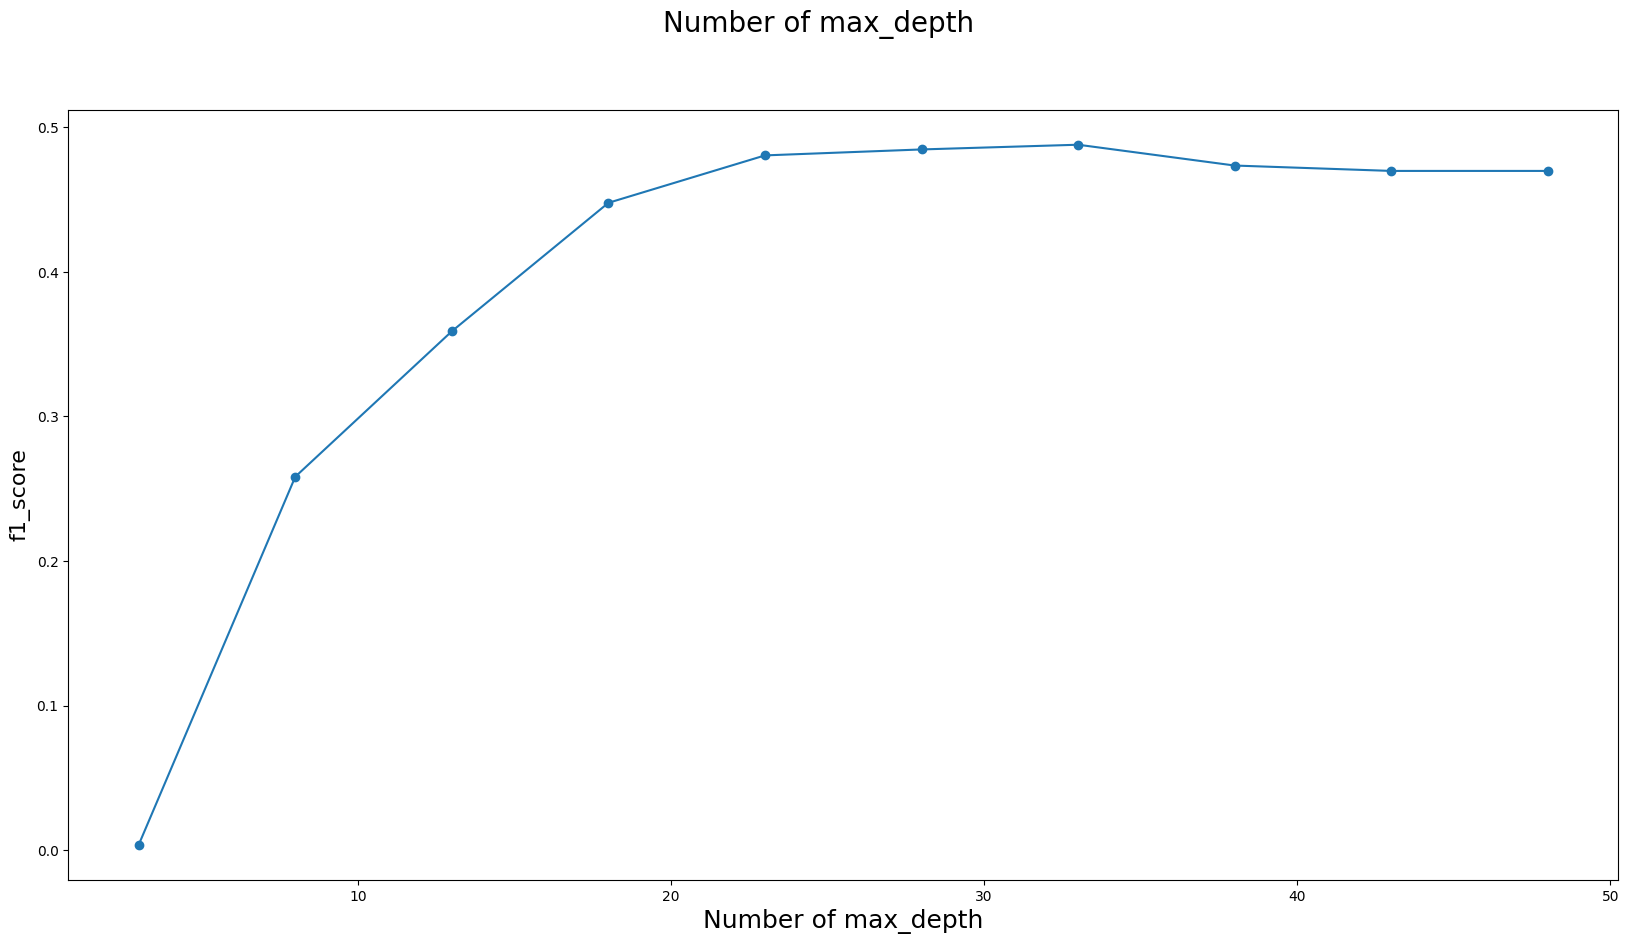

In [41]:
# data visualisation on f1_score and find the best num_max_depth
import matplotlib.pyplot as plt

score_array =[]
num_max_depth = []
for k in range(3,53,5):
    clf = RandomForestClassifier(n_estimators=500, random_state=1, max_depth=k) 
    clf = clf.fit(x_train, y_train)

    score_array.append(f1_score(y_test,clf.predict(x_test)))
    num_max_depth.append(k)
    
fig = plt.figure(figsize=(20, 10))
plt.plot(num_max_depth, score_array, marker='o')
fig.suptitle('Number of max_depth', fontsize=20)
plt.xlabel('Number of max_depth', fontsize=18)
plt.ylabel('f1_score', fontsize=16)

best f1_score = 0.4901844140392624


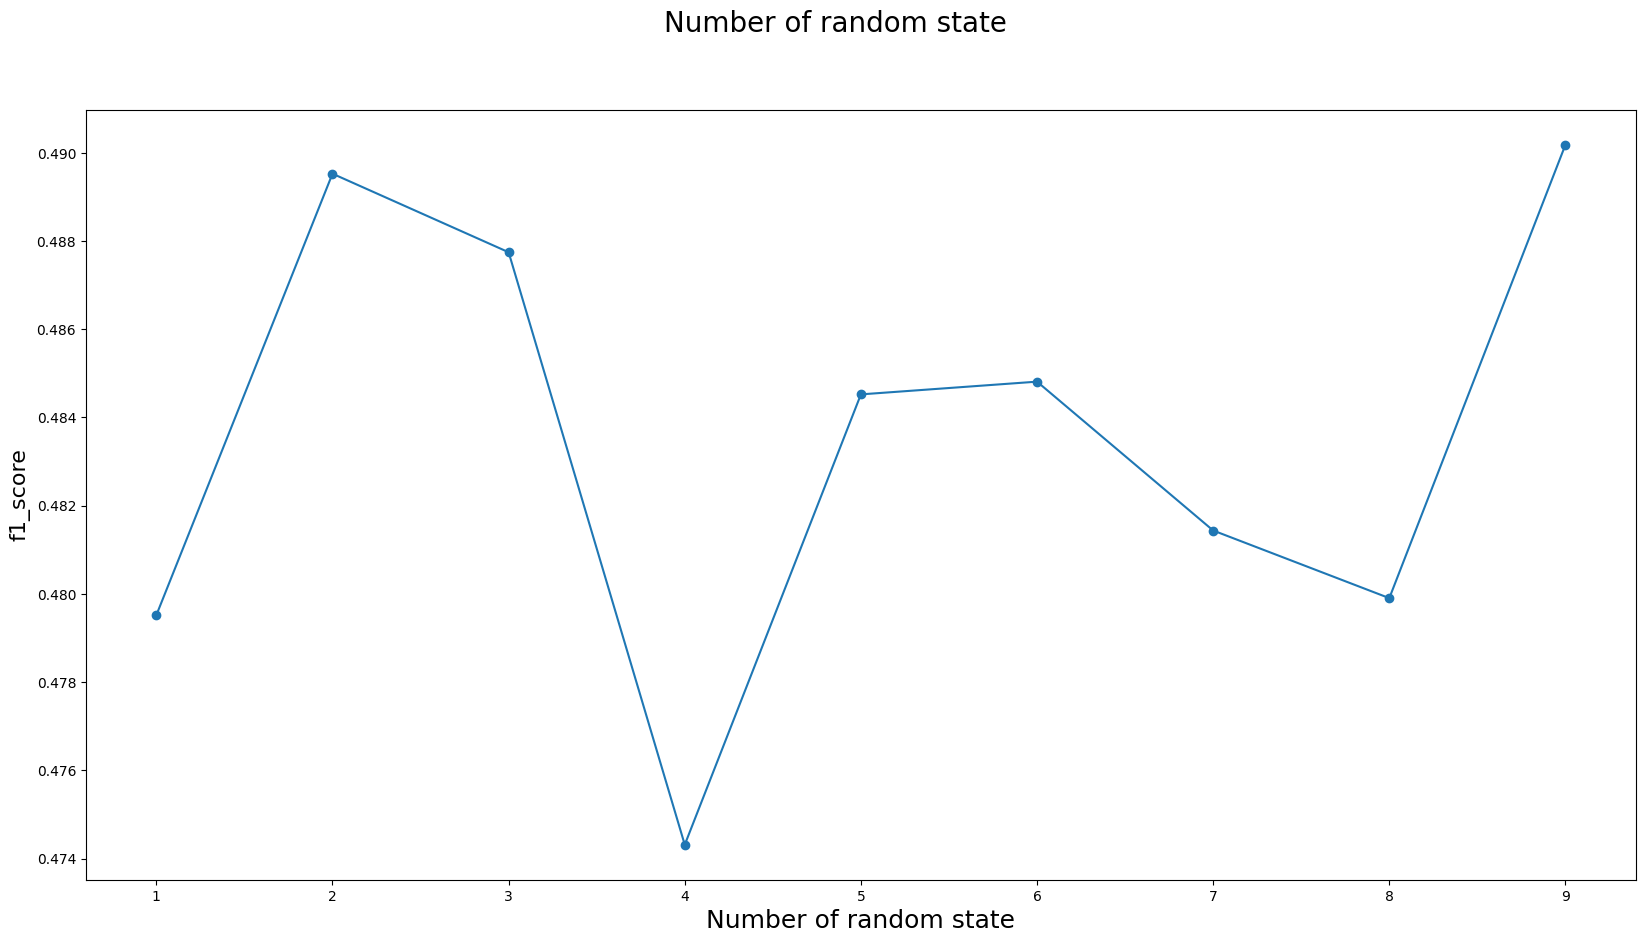

In [42]:
# data visualisation for best f1_score 
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

score_array =[]
num_random_state = []
for k in range(1,10):
    clf = RandomForestClassifier(n_estimators=500, random_state=k, max_depth=25) 
    clf = clf.fit(x_train, y_train)

    score_array.append(f1_score(y_test,clf.predict(x_test)))
    num_random_state.append(k)
    
fig = plt.figure(figsize=(20, 10))
plt.plot(num_random_state, score_array, marker='o')
fig.suptitle('Number of random state', fontsize=20)
plt.xlabel('Number of random state', fontsize=18)
plt.ylabel('f1_score', fontsize=16)
print('best f1_score =', max(score_array))

In [43]:
print('best f1_score =', max(score_array))

best f1_score = 0.4901844140392624
